#### In this section, we will acquire and analyze a real dataset on baby name popularity provided by the Social Security Administration.

In [2]:
# Import all the necessary libraries

%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats 

# To read zip files
import requests
import StringIO
import zipfile

In [3]:
# Helper function to download zipped datafile into memory directly from the internet
def getZIP(zipFileName):
    r = requests.get(zipFileName).content
    s = StringIO.StringIO(r)
    zf = zipfile.ZipFile(s, 'r') # Read in a list of zipped files
    return zf

In [4]:
# Warning: This might take 2-3 mins
url = 'http://www.ssa.gov/oact/babynames/state/namesbystate.zip'
zf = getZIP(url)
print zf.namelist()

['NC.TXT', 'ND.TXT', 'NE.TXT', 'NH.TXT', 'NJ.TXT', 'NM.TXT', 'NV.TXT', 'NY.TXT', 'OH.TXT', 'OK.TXT', 'OR.TXT', 'PA.TXT', 'RI.TXT', 'SC.TXT', 'SD.TXT', 'StateReadMe.pdf', 'TN.TXT', 'TX.TXT', 'UT.TXT', 'VA.TXT', 'VT.TXT', 'WA.TXT', 'WI.TXT', 'WV.TXT', 'WY.TXT', 'AK.TXT', 'AL.TXT', 'AR.TXT', 'AZ.TXT', 'CA.TXT', 'CO.TXT', 'CT.TXT', 'DC.TXT', 'DE.TXT', 'FL.TXT', 'GA.TXT', 'HI.TXT', 'IA.TXT', 'ID.TXT', 'IL.TXT', 'IN.TXT', 'KS.TXT', 'KY.TXT', 'LA.TXT', 'MA.TXT', 'MD.TXT', 'ME.TXT', 'MI.TXT', 'MN.TXT', 'MO.TXT', 'MS.TXT', 'MT.TXT']


### Analysis of Texas data file

In [5]:
# Lets open the Texas file
colNames = ['State','Sex','Year','Name','NumOcc']
txFile = pd.read_csv(zf.open('TX.TXT'),header=None,names=colNames)
print "Number of rows: %i" % txFile.shape[0]
txFile.head()

Number of rows: 324133


,State,Sex,Year,Name,NumOcc
0,TX,F,1910,Mary,895
1,TX,F,1910,Ruby,314
2,TX,F,1910,Annie,277
3,TX,F,1910,Willie,260
4,TX,F,1910,Ruth,252


In [6]:
txFile.tail()

,State,Sex,Year,Name,NumOcc
324128,TX,M,2014,Zavien,5
324129,TX,M,2014,Zavior,5
324130,TX,M,2014,Zeppelin,5
324131,TX,M,2014,Zev,5
324132,TX,M,2014,Zlatan,5


In [7]:
txFile.describe()

,Year,NumOcc
count,324133.000000,324133.000000
mean,1974.690720,67.320153
std,29.809297,212.191928
min,1910.000000,5.000000
25%,1951.000000,7.000000
50%,1981.000000,13.000000
75%,2001.000000,40.000000
max,2014.000000,5060.000000


In [8]:
boys = txFile[txFile.Sex=='M']
girls = txFile[txFile.Sex=='F']

In [9]:
# Checking to see if some names that clearly belong to one sex are also present in the other sex such 
# as 'Mary'
any(boys.Name == 'Mary')

True

### Q. Please describe the format of the data files. Can you identify any limitations or distortions of the data?

The format of the data file is a mix of type text and integer. 
* Files with mix types of data are generally harder to work with compared to those of one type only - for e.g. integer. 
* Column names are missing - a data scientist must refer to the accompaining 'StateReadMe' pdf to confirm their assumptions. Column names have to be manually added.
* In the Texas file, there is some distortion for e.g. 'Mary' although is clearly a girl's name also appears in a small number of cases in boys dataset.

In [10]:
# Grouping by year and sex
txFile.groupby(['Year','Sex']).size()

Year  Sex
1910  F       579
      M       343
1911  F       582
      M       368
1912  F       699
      M       546
1913  F       751
      M       640
1914  F       803
      M       720
1915  F       931
      M       813
1916  F       968
      M       848
1917  F       961
      M       842
1918  F       985
      M       850
1919  F      1011
      M       936
1920  F      1050
      M       984
1921  F      1078
      M      1006
1922  F      1071
      M      1018
1923  F      1082
      M       985
1924  F      1127
      M      1029
             ... 
2000  F      3007
      M      2056
2001  F      3121
      M      2142
2002  F      3220
      M      2167
2003  F      3315
      M      2195
2004  F      3347
      M      2287
2005  F      3408
      M      2391
2006  F      3533
      M      2406
2007  F      3695
      M      2522
2008  F      3692
      M      2574
2009  F      3779
      M      2597
2010  F      3648
      M      2575
2011  F      3603
      M      2570


Observation: Gradual increase in the diversity of names with each passing year from 579 (F,1910) to 3712 (F,2014). 


### Q. Find out the most popular name of all time for either gender
#### A. Mary (F), James (M)

In [11]:
# Import all the files into memory in one big data frame
stateList = zf.namelist()
stateList.remove('StateReadMe.pdf')
allStates = pd.DataFrame(columns = colNames) # Create an empty dataframe
for file in stateList:
    #print file
    data = pd.read_csv(zf.open(file),header=None,names=colNames,index_col=False)
    allStates = allStates.append(data,ignore_index=True)
#zf.close()

In [12]:
#allStates = allNames
#%reset_selective allNames

In [13]:
allStates.shape

(5647426, 5)

In [14]:
allBoys = allStates[allStates.Sex=='M']
allGirls = allStates[allStates.Sex == 'F']
#allStates.groupby(['Sex','Name']).NumOcc.sum()['F'].idxmax()

In [15]:
print allBoys.shape, allGirls.shape, allStates.shape

(2493417, 5) (3154009, 5) (5647426, 5)


In [16]:
%reset_selective allStates

Once deleted, variables cannot be recovered. Proceed (y/[n])?  n
Nothing done.


In [17]:
# Find the most popular name of all time ['M']:
allBoys.groupby('Name').NumOcc.sum().idxmax()

'James'

In [18]:
# Find the most popular name of all time ['F']:
allGirls.groupby('Name').NumOcc.sum().idxmax()

'Mary'

### Q What is the most gender ambiguous name in 2013? 1945?
#### A. Likely ambigious names for the year 2013 and 1945 are Milan and Lavern respectively

In [19]:
# Index by year and name for this question for faster retrieval
indBoys = allBoys.set_index(['Year'])
indGirls = allGirls.set_index(['Year'])

In [20]:
indBoys.head()

,State,Sex,Name,NumOcc
Year,,,,
1910,NC,M,James,612
1910,NC,M,William,452
1910,NC,M,John,413
1910,NC,M,Robert,240
1910,NC,M,George,215


In [21]:
def findAmbiguous(year):
# This function returns the most likely ambigious name (gender wise) for a given year
    boysY = indBoys.ix[year][['Name','NumOcc']]
    girlsY = indGirls.ix[year][['Name','NumOcc']]
    boysYGrouped = pd.DataFrame(boysY.groupby('Name')['NumOcc'].sum())
    girlsYGrouped = pd.DataFrame(girlsY.groupby('Name')['NumOcc'].sum())
    ind = boysYGrouped.index.intersection(girlsYGrouped.index) # find names that are common
    #log ratios of NumOcc are decent indicators of which 2 names are the most ambiguous
    ambRatio = np.log(girlsYGrouped.ix[ind])/np.log(boysYGrouped.ix[ind])
    ambRatio = ambRatio.query('NumOcc!=1') # remove ratios which equal to 1 as they tend to of lower frequency
    print "Likely ambigious name for the year %d" %(year) + " is %s" %(np.argmin(abs(ambRatio.NumOcc-1)))

In [22]:
findAmbiguous(2013)

Likely ambigious name for the year 2013 is Milan


In [23]:
findAmbiguous(1945)

Likely ambigious name for the year 1945 is Lavern


### Q. Of the names represented in the data, find the name that has had the largest percentage increase in popularity since 1980. Largest decrease?
#### A. Since 1980 Aiden (for boys) and Madison (for girls) has seen the largest increase in popularity. Shaquille (for boys) and Latoya (for girls) have seen their popularity drop the most.

In [24]:
# Index by name for this question for faster retrieval
indBoys = allBoys.set_index(['Name'])
indGirls = allGirls.set_index(['Name'])

In [25]:
def IncOrDec(*args, **kwargs):
# Finds the largest increase and decrease in popularity. If no year is provided, defaults to beginning
# of dataset i.e. 1910    
    if args:
        year = args[0]
    else:
        year = 1910
    boysY = indBoys[indBoys.Year>=year]
    girlsY = indGirls[indGirls.Year>=year]
    boysYGrouped = boysY.groupby([boysY.index,'Year'])['NumOcc'].sum()
    girlsYGrouped = girlsY.groupby([girlsY.index,'Year'])['NumOcc'].sum()
    
    def outcome(names,data,gender):
# A helper function - names  -> unique names in the dataset
#                   - data   -> grouped data by Name, Year        
#                   - gender -> 'boys' or 'girls'
        inc = {}
        dec = {}
        for name in names:
            record = data.ix[name]
            maxValue = record.max()
            minValue = record.min()
            maxYear = record.argmax()
            minYear = record.argmin()
            if maxYear<=minYear:
                dec[name] = (maxValue-minValue)*1./maxValue
            else:
                inc[name] = (maxValue-minValue)*1./minValue
        perInc = max(inc.values())
        perDec = max(dec.values())
        nameInc = max(inc.iterkeys(), key=(lambda k: inc[k]))
        nameDec = max(dec.iterkeys(), key=(lambda k: dec[k]))
        print "Among %s" %(gender) + ", %s has seen the highest increase of" %(nameInc) +" %.2f percent in popularity" %(perInc*100)
        print ".. and the opposite is true for %s" %(nameDec) + " with %.2f percent decrease in popularity" %(perDec*100)
    print "Since %d:" %(year)
    outcome(boysY.index.unique(),boysYGrouped,'boys')
    outcome(girlsY.index.unique(),girlsYGrouped,'girls')

In [26]:
# Find which names are most popular and least popular from a year of interest (YOI)
YOI = 1980
IncOrDec(YOI)

Since 1980:
Among boys, Aiden has seen the highest increase of 319900.00 percent in popularity
.. and the opposite is true for Shaquille with 99.72 percent decrease in popularity
Among girls, Madison has seen the highest increase of 369200.00 percent in popularity
.. and the opposite is true for Latoya with 99.90 percent decrease in popularity


### Q. Can you identify names that may have had an even larger increase or decrease in popularity?
#### A. Since 1910, Jason (for boys) and Jennifer (for girls) has seen the largest increase in popularity. Kim (for boys) and Rhonda (for girls) have seen their popularity drop the most        

In [27]:
# Find which names are most popular and least popular from the full data set.
IncOrDec()

Since 1910:
Among boys, Jason has seen the highest increase of 927383.33 percent in popularity
.. and the opposite is true for Kim with 99.86 percent decrease in popularity
Among girls, Jennifer has seen the highest increase of 1272020.00 percent in popularity
.. and the opposite is true for Rhonda with 99.95 percent decrease in popularity


### Additional Insight
Let us have a look at [Google books Ngram viewer](https://books.google.com/ngrams/info) - a tool to plot trends of words present in books over a period of time. The y-axis informs us of the presence of any word (in %) amongst other words printed in english books present in that year.
Our goal is to find out if there is a correlation between the results in an Ngram viewer and our baby names dataset - i.e. were people naming their babies after the names of popular characters in american books.
Since the Ngram viewer is in a ratio (ignore the % units for now), let us also plot our baby names values similarly i.e. for any given year - calculate the ratio of total occurances of a name to total occurances of all names in that year.

In [28]:
# Since we are looking at the ratio of a name to all the names in a year, we will be 'merging' the 
# two gender divided data sets. We will then sum the occurances of all names in each year.
fullDataset = allBoys.append(allGirls)
allYearGrouped = fullDataset.groupby('Year')['NumOcc'].sum()
allYearGrouped = allYearGrouped.to_frame(name='Pop').reset_index()

In [29]:
allYearGrouped.head()

,Year,Pop
0,1910,516318
1,1911,565810
2,1912,887984
3,1913,1028553
4,1914,1293322


In [30]:
# Merge the grouped dataset (above, on Year) with the full dataset
fullDataset = fullDataset.merge(allYearGrouped,on='Year')

In [31]:
fullDataset.head()

,State,Sex,Year,Name,NumOcc,Pop
0,NC,M,1910,James,612,516318
1,NC,M,1910,William,452,516318
2,NC,M,1910,John,413,516318
3,NC,M,1910,Robert,240,516318
4,NC,M,1910,George,215,516318


In [32]:
# Calculate the ratio of occurance of a name against the total occurances of all names in that year
fullDataset['Prop'] = fullDataset.NumOcc/fullDataset.Pop

In [33]:
fullDataset.head()

,State,Sex,Year,Name,NumOcc,Pop,Prop
0,NC,M,1910,James,612,516318,0.001185
1,NC,M,1910,William,452,516318,0.000875
2,NC,M,1910,John,413,516318,0.000800
3,NC,M,1910,Robert,240,516318,0.000465
4,NC,M,1910,George,215,516318,0.000416


In [34]:
fullNameGrouped = fullDataset.groupby(['Name','Year'])['Prop'].sum()

In [35]:
fullNameGrouped.head(n=10)

Name     Year
Aaban    2013    0.000002
         2014    0.000002
Aadan    2008    0.000004
         2009    0.000002
         2014    0.000002
Aadarsh  2009    0.000002
Aaden    2005    0.000002
         2007    0.000029
         2008    0.000281
         2009    0.000384
Name: Prop, dtype: float64

In [36]:
# Plot a simple graph to trend the popularity of a name
from IPython.display import IFrame
def plotNames(name,data):
    data.ix[name].plot(grid=1,figsize=(11,4),legend=True,title='Trend of %s' %(name))

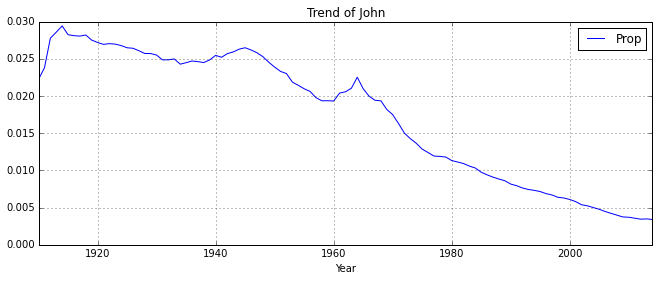

In [37]:
# Please enter name here and play with different names:
name = 'John'

if name in fullNameGrouped.index:
    plotNames(name,fullNameGrouped)
else:
    print "%s not present in the dataset" %(name)


In [38]:
# Ngram viwewer tool
IFrame(src="https://books.google.com/ngrams/interactive_chart?content=%s"%(name)+
       "&year_start=1910&year_end=2008&corpus=5&smoothing=2&share=&direct_url=t1%3B%2C"+"%s"%(name)+
       "%3B%2Cc0",width=800, height=320)

As you will see when you start to play with different names that characters present in books have very little weightage on how parents name their babies. In order to understand what is influencing naming of babies, we should analyse data coming from other media sources: radio/TV/Movie personalities and other famous people. 
We should also note that the baby name dataset is only a partial list as it is only those who have registered with SSN have been included. A better analysis can be performed if we could retrieve names of babies without SSN regristration as well.